In [4]:
from langchain_openai import ChatOpenAI
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from typing_extensions import TypedDict
from typing import Annotated, List
from dotenv import load_dotenv
import os

In [5]:
load_dotenv()

openai_model = os.getenv("OPENAI_MODEL", "gpt-4o-mini")


In [6]:
class State(TypedDict):
    # messages: Annotated[List, add_messages]
    messages: []

llm = ChatOpenAI(model=openai_model)

def chatbot(state: State):
    response = llm.invoke(state["messages"])
    return {"messages": [response]}

In [10]:

workflow = StateGraph(State)
workflow.add_edge(START, "chatbot")
workflow.add_node("chatbot", chatbot)
workflow.add_edge("chatbot", END)
graph = workflow.compile()

/usr/local/lib/python3.11/site-packages/pydantic/_internal/_generate_schema.py:628: UserWarning: [] is not a Python type (it may be an instance of an object), Pydantic will allow any object with no validation since we cannot even enforce that the input is an instance of the given type. To get rid of this error wrap the type with `pydantic.SkipValidation`.
  warn(


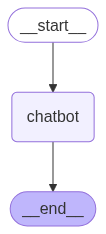

In [11]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [9]:
from langchain_core.messages import HumanMessage

user_input = "LangGraph가 무엇인가요?"
state = {"messages": [HumanMessage(content=user_input)]}
response = graph.invoke(state)

print(response["messages"][-1].content)


LangGraph는 언어 모델과 그래프 이론을 결합하여 자연어 처리(NLP)와 관련된 다양한 작업을 수행하는 시스템이나 기술을 의미할 수 있습니다. 일반적으로 "Lang"는 언어(Language)를 의미하고, "Graph"는 그래프 구조나 네트워크를 나타냅니다. 

이러한 접근 방식은 언어의 의미론적 관계를 그래프로 표현하여, 단어와 그들 사이의 관계를 시각화하고 분석하는 데 도움을 줄 수 있습니다. 예를 들어, LangGraph는 다음과 같은 작업에 사용할 수 있습니다:

1. **지식 표현**: 개념 간의 관계를 그래프 형태로 표현하여 언어 모델이 더 깊이 있는 이해를 할 수 있게 도와줍니다.
2. **정보 검색**: 특정 개념이나 질문에 대한 관련 정보를 그래프에서 쉽게 추출할 수 있습니다.
3. **다양한 NLP 작업**: 기계 번역, 질의 응답 시스템, 텍스트 요약 등 다양한 NLP 작업을 지원할 수 있습니다.

LangGraph의 구체적인 구현이나 기능은 개발자나 연구자에 따라 다를 수 있으며, 관련 최신 연구나 문헌을 참고하는 것이 좋습니다. 특정 LangGraph라는 이름의 라이브러리나 프로젝트도 존재할 수 있으므로, 구체적인 맥락에 따라 다르게 해석될 수도 있습니다.
